# Topic:  Different Factors vs Academic Performance

## Import the Data

In [396]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('student-performance.csv')
df

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,High,Medium,No,7,76,Medium,Yes,1,High,Medium,Public,Positive,2,No,High School,Near,Female,68
6603,23,76,High,Medium,No,8,81,Medium,Yes,3,Low,High,Public,Positive,2,No,High School,Near,Female,69
6604,20,90,Medium,Low,Yes,6,65,Low,Yes,3,Low,Medium,Public,Negative,2,No,Postgraduate,Near,Female,68
6605,10,86,High,High,Yes,6,91,High,Yes,2,Low,Medium,Private,Positive,3,No,High School,Far,Female,68


In [397]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

## Data Cleaning & Preprocessing

### Handle missing values

In [398]:
df.isnull().sum()

Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64

- There are missing values in Teacher_Quality, Parental_Education_Level, and Distance_from_Home

<Axes: xlabel='Teacher_Quality'>

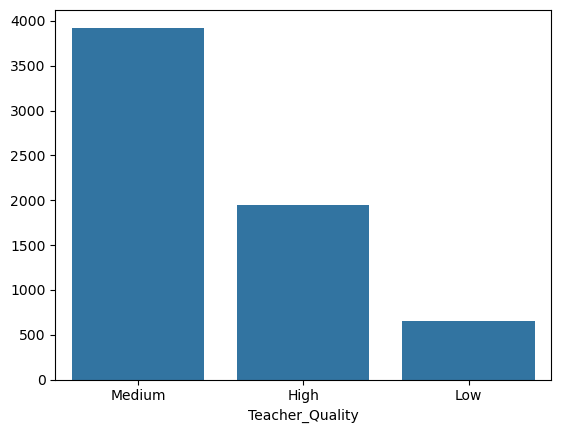

In [399]:
sns.barplot(x=df['Teacher_Quality'].value_counts().index, y=df['Teacher_Quality'].value_counts().values)

<Axes: xlabel='Parental_Education_Level'>

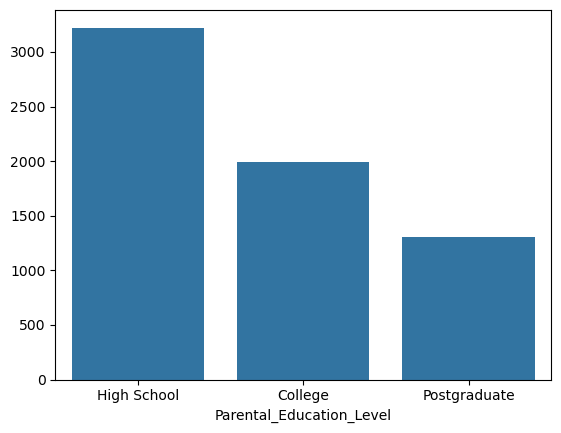

In [400]:
sns.barplot(x=df['Parental_Education_Level'].value_counts().index, y=df['Parental_Education_Level'].value_counts().values)

<Axes: xlabel='Distance_from_Home'>

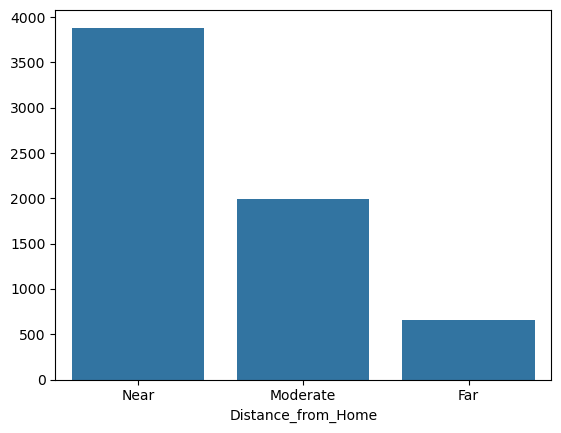

In [401]:
sns.barplot(x=df['Distance_from_Home'].value_counts().index, y=df['Distance_from_Home'].value_counts().values)

- Since these 3 are Categorical labels, we would use Mode (the most proble value) to Impute the missing values.


In [402]:
# use mode to impute missing values for categorical variables
for column in ['Teacher_Quality', 'Parental_Education_Level', 'Distance_from_Home']:
    mode_value = df[column].mode()[0]
    df[column] = df[column].fillna(mode_value)

In [403]:
df.isnull().sum()

Hours_Studied                 0
Attendance                    0
Parental_Involvement          0
Access_to_Resources           0
Extracurricular_Activities    0
Sleep_Hours                   0
Previous_Scores               0
Motivation_Level              0
Internet_Access               0
Tutoring_Sessions             0
Family_Income                 0
Teacher_Quality               0
School_Type                   0
Peer_Influence                0
Physical_Activity             0
Learning_Disabilities         0
Parental_Education_Level      0
Distance_from_Home            0
Gender                        0
Exam_Score                    0
dtype: int64

### Handle duplicates

In [404]:
df.duplicated().sum()

0

### Handle Outliers

<Axes: xlabel='Hours_Studied'>

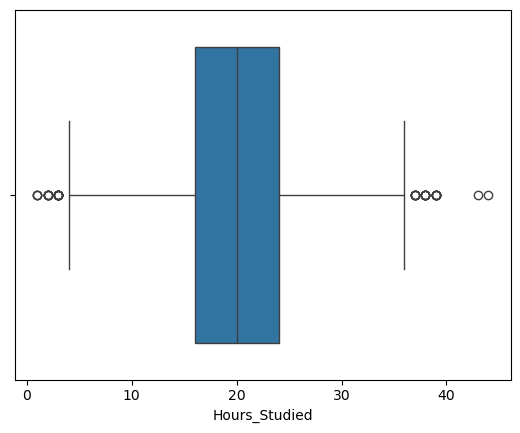

In [405]:
sns.boxplot(x=df['Hours_Studied'])

In [406]:
Q1 = df['Hours_Studied'].quantile(0.25)
Q3 = df['Hours_Studied'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['Hours_Studied'] < lower_bound) | (df['Hours_Studied'] > upper_bound)]
num_outliers = outliers.shape[0]

print(f'Number of outliers: {num_outliers}')

Number of outliers: 43


In [407]:
print(df['Hours_Studied'].max())
print(df['Hours_Studied'].min())

44
1


- Studying 1 to 44 hours per week can be considered as normal data, they are not extreme values. We would remain them in the dataset. 

<Axes: xlabel='Attendance'>

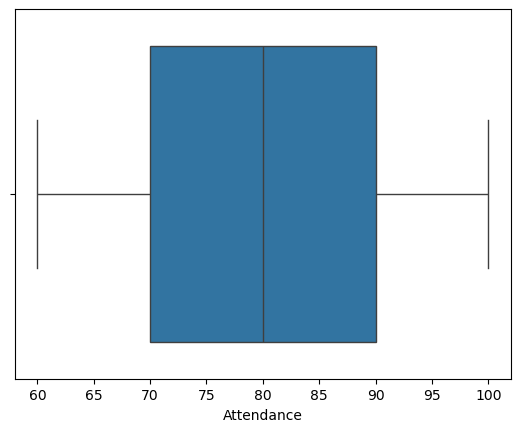

In [408]:
sns.boxplot(x=df['Attendance'])

- no outliers detected

<Axes: xlabel='Sleep_Hours'>

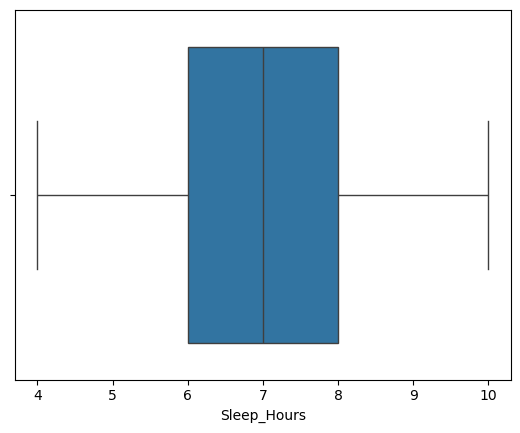

In [409]:
sns.boxplot(x=df['Sleep_Hours'])

- no outliers detected

<Axes: xlabel='Previous_Scores'>

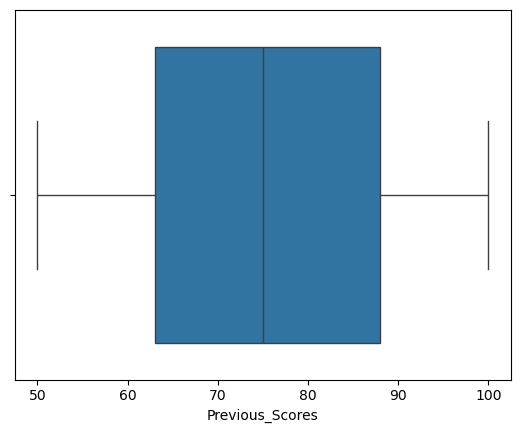

In [410]:
sns.boxplot(x=df['Previous_Scores'])

- no outliers detected

<Axes: xlabel='Tutoring_Sessions'>

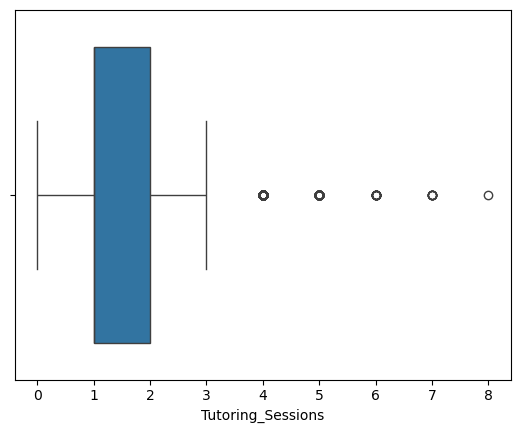

In [411]:
sns.boxplot(x=df['Tutoring_Sessions'])

In [412]:
Q1 = df['Tutoring_Sessions'].quantile(0.25)
Q3 = df['Tutoring_Sessions'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['Tutoring_Sessions'] < lower_bound) | (df['Tutoring_Sessions'] > upper_bound)]
num_outliers = outliers.shape[0]

print(f'Number of outliers: {num_outliers}')

Number of outliers: 430


In [413]:
print(df['Tutoring_Sessions'].max())
print(df['Tutoring_Sessions'].min())

8
0


- Though there are high numbers of outliers, receiving 0 to 8 tutoring sessions per month can be regarded as normal. We would just remain these data within our data set for analysis

<Axes: xlabel='Physical_Activity'>

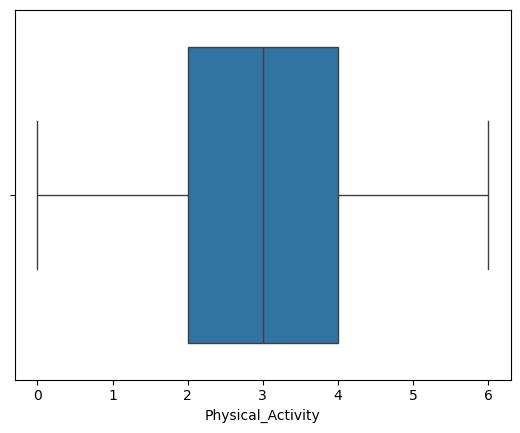

In [414]:
sns.boxplot(x=df['Physical_Activity'])

- no outliers detected

<Axes: xlabel='Exam_Score'>

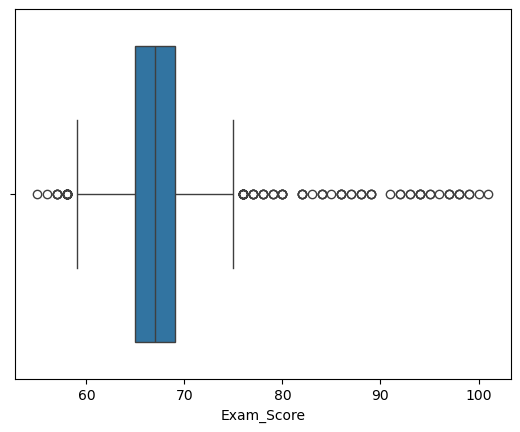

In [415]:
sns.boxplot(x=df['Exam_Score'])

In [416]:
Q1 = df['Exam_Score'].quantile(0.25)
Q3 = df['Exam_Score'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['Exam_Score'] < lower_bound) | (df['Exam_Score'] > upper_bound)]
num_outliers = outliers.shape[0]

print(f'Number of outliers: {num_outliers}')

Number of outliers: 104


In [417]:
df['Exam_Score'].describe()

count    6607.000000
mean       67.235659
std         3.890456
min        55.000000
25%        65.000000
50%        67.000000
75%        69.000000
max       101.000000
Name: Exam_Score, dtype: float64

- min value 55 is normal achievable score
- However, we notice 101 marks, which might be noise due to incorrect data entry.

In [418]:
df.loc[df['Exam_Score'] > 100, 'Exam_Score'] 

1525    101
Name: Exam_Score, dtype: int64

- There is only one record, we would simply impute it with constant 100

In [419]:
df.loc[df['Exam_Score'] > 100, 'Exam_Score'] = 100

In [420]:
df

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,High,Medium,No,7,76,Medium,Yes,1,High,Medium,Public,Positive,2,No,High School,Near,Female,68
6603,23,76,High,Medium,No,8,81,Medium,Yes,3,Low,High,Public,Positive,2,No,High School,Near,Female,69
6604,20,90,Medium,Low,Yes,6,65,Low,Yes,3,Low,Medium,Public,Negative,2,No,Postgraduate,Near,Female,68
6605,10,86,High,High,Yes,6,91,High,Yes,2,Low,Medium,Private,Positive,3,No,High School,Far,Female,68


In [421]:
df.to_csv('student-performance-cleaned.csv', index=False)

## Summary Statistics

## Data Visualisation

## Correlation Analysis

## Other Methods (Linear Regression)

In [422]:
df = pd.read_csv('student-performance-cleaned.csv')
df

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,High,Medium,No,7,76,Medium,Yes,1,High,Medium,Public,Positive,2,No,High School,Near,Female,68
6603,23,76,High,Medium,No,8,81,Medium,Yes,3,Low,High,Public,Positive,2,No,High School,Near,Female,69
6604,20,90,Medium,Low,Yes,6,65,Low,Yes,3,Low,Medium,Public,Negative,2,No,Postgraduate,Near,Female,68
6605,10,86,High,High,Yes,6,91,High,Yes,2,Low,Medium,Private,Positive,3,No,High School,Far,Female,68


- We will fit a linear regression model to evaluate the significance of various factors for predicting the target 'exam score' 

In [423]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6607 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [424]:
import pandas as pd

from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

df = pd.get_dummies(df, columns=['Parental_Involvement','Access_to_Resources','Extracurricular_Activities','Motivation_Level', 'Internet_Access','Family_Income', 'Teacher_Quality', 'School_Type',
       'Peer_Influence','Learning_Disabilities',
       'Parental_Education_Level', 'Distance_from_Home', 'Gender'], drop_first=True)  # One-hot encode categorical variables
df = df.astype(int)

# Define dependent and independent variables
y = df['Exam_Score']
X = df[df.columns.difference(['Exam_Score'])]


# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Add constant
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)


# Fit the model
model = sm.OLS(y_train, X_train).fit()

# Output the summary
print(model.summary())

# Make predictions on the test set
predictions = model.predict(X_test)
print(predictions)

mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)


print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R²): {r2:.2f}")

                            OLS Regression Results                            
Dep. Variable:             Exam_Score   R-squared:                       0.718
Model:                            OLS   Adj. R-squared:                  0.716
Method:                 Least Squares   F-statistic:                     495.1
Date:                Tue, 04 Nov 2025   Prob (F-statistic):               0.00
Time:                        16:28:40   Log-Likelihood:                -11377.
No. Observations:                5285   AIC:                         2.281e+04
Df Residuals:                    5257   BIC:                         2.299e+04
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

- Gender_Male, School_Type_Public, Sleep_Hours have high p-value (0.664, 0.787, 0.529) for predicting exam score. 
- They might not be significant for predicting our target 'exam_score'.                             